<a href="https://colab.research.google.com/github/arslansevval/PoisonousMushroomDetector/blob/main/Poisonous_Mushroom_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Set Informations

5. Class information:
	1. class		poisonous=p, edibile=e (binary)

6. Variable Information:
   (n: nominal, m: metrical; nominal values as sets of values)
   1. cap-diameter (m):			    float number in cm
   2. cap-shape (n):            bell=b, conical=c, convex=x, flat=f,
                                sunken=s, spherical=p, others=o
   3. cap-surface (n):          fibrous=i, grooves=g, scaly=y, smooth=s,
								shiny=h, leathery=l, silky=k, sticky=t,
								wrinkled=w, fleshy=e
   4. cap-color (n):            brown=n, buff=b, gray=g, green=r, pink=p,
								purple=u, red=e, white=w, yellow=y, blue=l, 
								orange=o,  black=k
   5. does-bruise-bleed (n):	bruises-or-bleeding=t,no=f
   6. gill-attachment (n):      adnate=a, adnexed=x, decurrent=d, free=e, 
								sinuate=s, pores=p, none=f, unknown=?
   7. gill-spacing (n):         close=c, distant=d, none=f
   8. gill-color (n):           see cap-color + none=f
   9. stem-height (m):			float number in cm
   10. stem-width (m):			float number in mm   
   11. stem-root (n):           bulbous=b, swollen=s, club=c, cup=u, equal=e,
                                rhizomorphs=z, rooted=r
   12. stem-surface (n): 		see cap-surface + none=f
   13. stem-color (n):			see cap-color + none=f
   14. veil-type (n):           partial=p, universal=u
   15. veil-color (n):          see cap-color + none=f
   16. has-ring (n):            ring=t, none=f
   17. ring-type (n):           cobwebby=c, evanescent=e, flaring=r, grooved=g, 
							    large=l, pendant=p, sheathing=s, zone=z, scaly=y, movable=m, none=f, unknown=?
   18. spore-print-color (n):   see cap color
   19. habitat (n):             grasses=g, leaves=l, meadows=m, paths=p, heaths=h,
                                urban=u, waste=w, woods=d
   20. season (n):				spring=s, summer=u, autumn=a, winter=w




## Business Understanding

Projenin amacı bu adımda tanımlanır. Projenin ana hedefinin ne olduğunu tüm proje paydaşlarıyla görüşüp akabinde proje sponsoru ile el sıkışarak doğru bir şekilde belirlenmelidir. Yanlış anlaşılma veya düzgün anlaşılmama gibi durumlarda ileride büyük sıkıntılar ortaya çıkar çünkü bu adım data mining işleminin temelidir. Bizim amacımız ise verilen dataya göre hangi tür mantarın zehirli, hangi türlü mantarın ise yenilebilir olduğunu bulmak.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("/content/drive/MyDrive/secondary_data.csv", sep= ';', decimal= ',')

Bu adımda veri setimizin kayıtlı olduğu yerden datayı çekiyoruz.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   class                 61069 non-null  object
 1   cap-diameter          61069 non-null  object
 2   cap-shape             61069 non-null  object
 3   cap-surface           46949 non-null  object
 4   cap-color             61069 non-null  object
 5   does-bruise-or-bleed  61069 non-null  object
 6   gill-attachment       51185 non-null  object
 7   gill-spacing          36006 non-null  object
 8   gill-color            61069 non-null  object
 9   stem-height           61069 non-null  object
 10  stem-width            61069 non-null  object
 11  stem-root             9531 non-null   object
 12  stem-surface          22945 non-null  object
 13  stem-color            61069 non-null  object
 14  veil-type             3177 non-null   object
 15  veil-color            7413 non-null 

Elimizde kaç adet veri olduğuna bakıyoruz.

In [4]:
df.head(10)

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.6,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.8,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,17.2,s,y,w,u,w,t,p,NaN,d,w
5,p,15.34,x,g,o,f,e,NaN,w,17.84,18.79,s,y,w,u,w,t,p,NaN,d,u
6,p,14.85,f,h,o,f,e,NaN,w,17.71,16.89,s,y,w,u,w,t,g,NaN,d,w
7,p,14.86,x,h,e,f,e,NaN,w,17.03,17.44,s,y,w,u,w,t,p,NaN,d,u
8,p,12.85,f,g,o,f,e,NaN,w,17.27,18.69,s,y,w,u,w,t,p,NaN,d,a
9,p,13.55,f,g,e,f,e,NaN,w,16.04,16.88,s,y,w,u,w,t,p,NaN,d,w


Veri setimize kısa bir göz atıyoruz.

In [5]:
df.describe(include = 'all').transpose()

,count,unique,top,freq
class,61069,2,p,33888
cap-diameter,61069,2571,3.18,103
cap-shape,61069,7,x,26934
cap-surface,46949,11,t,8196
cap-color,61069,12,n,24218
does-bruise-or-bleed,61069,2,f,50479
gill-attachment,51185,7,a,12698
gill-spacing,36006,3,c,24710
gill-color,61069,12,w,18521
stem-height,61069,2226,0.0,1059


Data seti içerisindeki verilerin neler olduğu, ne sıklıkla geldiği ve en çok kullanılan verinin ne olduğunu görüyoruz.

In [6]:
df.isnull().values.any()

True

Boş değer var mı diye bakıyoruz.

In [7]:
df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

Elimizde çok fazla boş veri var bunları ya bir şekilde veri setimize uydurmamız veya bunları silmemiz gerekiyor.

Önemli olabileceği halde çok fazla boş olan veriler var. Bu boşluklar 25.000 ile 55.000 arasında değişebiliyor. Bunları herhangi bir şekilde ortalamaya uydurmak veya değer vermek pek mantıklı değil. Yaptığımız değişiklikler hepsi için aynı oranda olacağı için bu sütunlarda yaptığımız değişikliklerin bir anlamı yok. Ancak geri kalan 3 adet verinin eksikliği 2.000 - 15.000 arasında bunları bir ölçeğe sokabiliriz.

In [8]:
df2 = df.drop(columns=['gill-spacing', 'stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color'])

In [9]:
df2['ring-type']= df2['ring-type'].fillna('f')
df2['gill-attachment']= df2['gill-attachment'].fillna('a')
df2['cap-surface']= df2['cap-surface'].fillna('t')

Çok fazla eksik olan satırları düşürdük ve geri kalanları da en fazla tekrar eden değer ile değiştirdik.

In [10]:
df2.isna().sum()

class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-color              0
stem-height             0
stem-width              0
stem-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

Artık veri setimiz daha temiz bir hal aldı.

In [11]:
duplicate_rows_data = df2[df2.duplicated()]
df2 = df2.drop_duplicates()

Aynı değere sahip değerleri, yani duplicate değerleri siliyoruz.

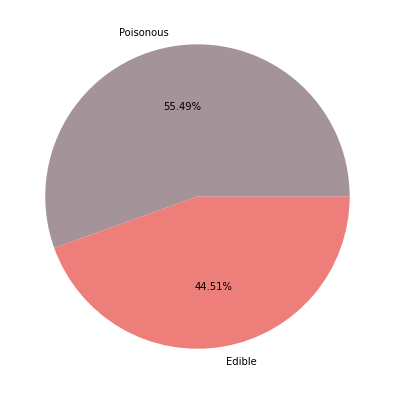

In [12]:
colors = ['#A49399', '#ED7E79']
labels = ['Poisonous', 'Edible']
data = df['class'].value_counts()
fig = plt.figure(figsize =(12, 7)) 
plt.pie(data, autopct='%1.2f%%', labels = labels, colors=colors)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


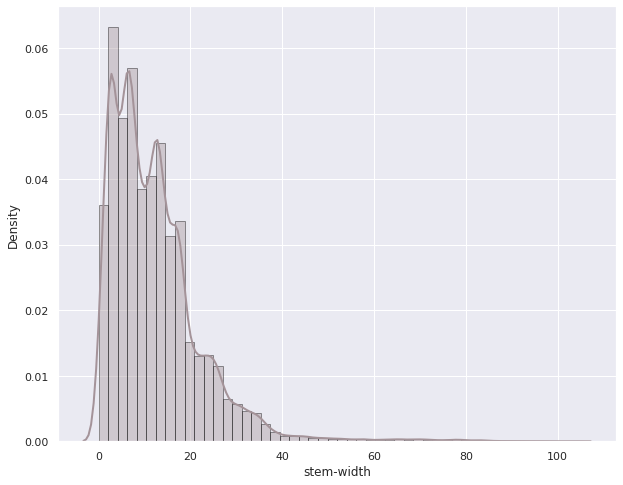

In [13]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(df2['stem-width'], hist=True, kde=True, 
             bins=50, color = '#A49399', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             )

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


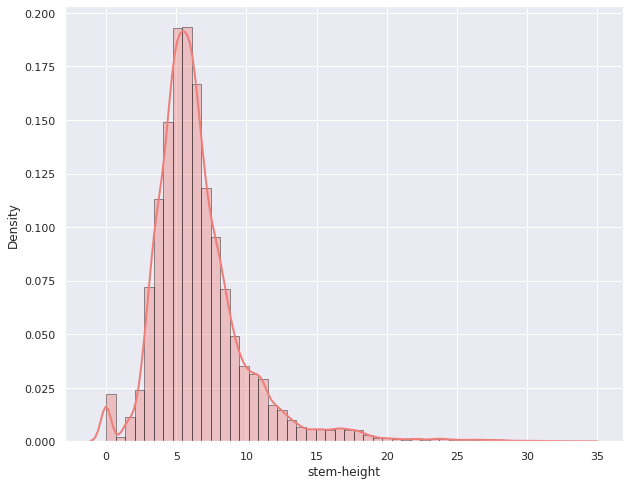

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(df2['stem-height'], hist=True, kde=True, 
             bins=50, color = '#ED7E79', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             )

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


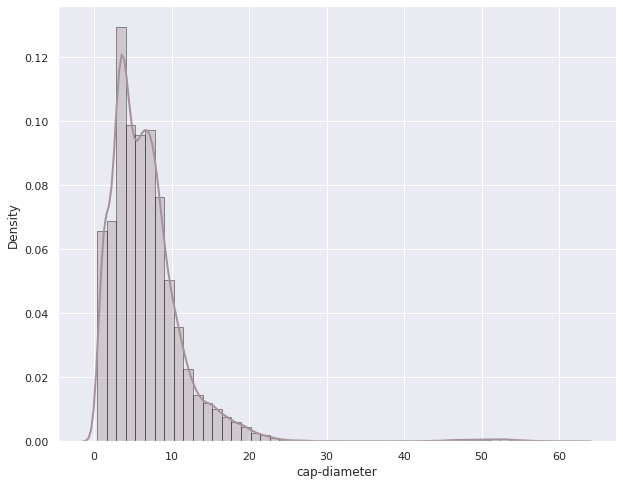

In [15]:
sns.set(rc={'figure.figsize':(10,8)})
sns.distplot(df2['cap-diameter'], hist=True, kde=True, 
             bins=50, color = '#A49399', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
             )

plt.show()

In [16]:
df2['stem-height'] = df2['stem-height'].astype(np.float)
df2['cap-diameter'] = df2['cap-diameter'].astype(np.float)
df2['stem-width'] = df2['stem-width'].astype(np.float)

Elimizdeki verileri korelasyon var mı diye incelememiz gerekiyor. Aralarındaki bu ilişkiye ancak sayısal değerler için bakabiliriz. Ama veri setimizdeki sayısal veriler string olarak kayıtlı olduğu için önce onları float formatına çevirmemiz gerekti.

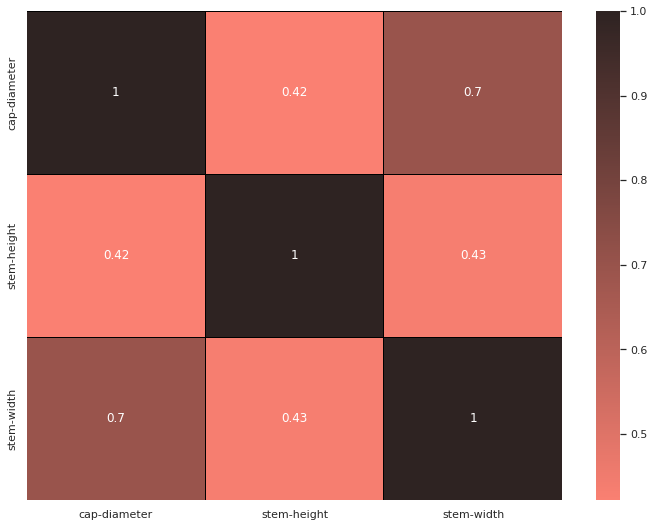

In [17]:
import seaborn as sns
corr = df2.corr()
plt.figure(figsize=(12,9))
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidth= 0.2,
            linecolor = 'black',
            annot = True,
            cmap = cmap,
            )

## Data Preprocessing

In [18]:
df2.iloc[:5].values

array([['p', 15.26, 'x', 'g', 'o', 'f', 'e', 'w', 16.95, 17.09, 'w', 't',
        'g', 'd', 'w'],
       ['p', 16.6, 'x', 'g', 'o', 'f', 'e', 'w', 17.99, 18.19, 'w', 't',
        'g', 'd', 'u'],
       ['p', 14.07, 'x', 'g', 'o', 'f', 'e', 'w', 17.8, 17.74, 'w', 't',
        'g', 'd', 'w'],
       ['p', 14.17, 'f', 'h', 'e', 'f', 'e', 'w', 15.77, 15.98, 'w', 't',
        'p', 'd', 'w'],
       ['p', 14.64, 'x', 'h', 'o', 'f', 'e', 'w', 16.53, 17.2, 'w', 't',
        'p', 'd', 'w']], dtype=object)

.iloc sayesinde n'den m'ye kadar giden değerleri kolaylıkla inceleyebiliriz. Elimizdeki değerlerle çalışmak için numerik verilere sahip olmamız gerekli ancak gördüğümüz gibi cap-shape, cap-color, cap-surface gibi string türünde verilere sahip

In [19]:
label_encoder = LabelEncoder()
df['cap-shape'] = label_encoder.fit_transform(df['cap-shape'])
df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,6,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,p,16.6,6,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,6,g,o,f,e,NaN,w,17.8,17.74,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,2,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,6,h,o,f,e,NaN,w,16.53,17.2,s,y,w,u,w,t,p,NaN,d,w


String türünde olan değerlerimizi burada integer'a çevirdiğimize göre veri inceleme işlemine bir adım daha yaklaşıyoruz. Lakin bu işlem sonunda şöyle bir sorun oluşuyor. Farklı türde boyut, renk veya sezon gibi veriler için farklı integer değerleri atadı. Örneğin cap-shape için her bir farklı şekile ayrı bir sayı atandı. Matematiksel olarak 2>1 ama bu herhangi bir türün veya renginin bir diğerine üstünlük sağladığı anlamına gelmiyor ama bilgisayar bunu bilmiyor, o yüzden dummy variableları kullanmamız gerekiyor.

In [20]:
dummy = pd.get_dummies(df2['cap-shape'])
dummy2 = pd.get_dummies(df2['cap-surface'])
dummy3 = pd.get_dummies(df2['cap-color'])
dummy4 = pd.get_dummies(df2['does-bruise-or-bleed'])
dummy5 = pd.get_dummies(df2['gill-attachment'])
dummy6 = pd.get_dummies(df2['gill-color'])
dummy7 = pd.get_dummies(df2['stem-color'])
dummy8 = pd.get_dummies(df2['has-ring'])
dummy9 = pd.get_dummies(df2['ring-type'])
dummy10 = pd.get_dummies(df2['habitat'])
dummy11 = pd.get_dummies(df2['season'])

Yukarıda belirtilen sebepten dolayı bir şekilde bizlere verilmiş olan integerlarla oynamamız gerekiyor. Burada da yardımımıza dummy variable yetişiyor. Burada yaptığımız işlem her bir verideki üstünlük durumunu ortadan kaldırıyoruz. Belirtilen tipte ise 1, değil ise 0 değerini alıyor

In [21]:
df2 = pd.concat([df2,dummy, dummy2, dummy3, dummy4, dummy5, dummy6,dummy7, dummy8, dummy9,dummy10, dummy11], axis = 1)
df2.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season,b,c,f,o,p,s,x,d,e,g,h,i,k,l,s,t,w,y,b,e,g,k,l,n,o,...,p,r,u,w,y,b,e,f,g,k,l,n,o,p,r,u,w,y,f,t,e,f,g,l,m,p,r,z,d,g,h,l,m,p,u,w,a,s,u,w
0,p,15.26,x,g,o,f,e,w,16.95,17.09,w,t,g,d,w,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,p,16.60,x,g,o,f,e,w,17.99,18.19,w,t,g,d,u,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,p,14.07,x,g,o,f,e,w,17.80,17.74,w,t,g,d,w,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,p,14.17,f,h,e,f,e,w,15.77,15.98,w,t,p,d,w,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,p,14.64,x,h,o,f,e,w,16.53,17.20,w,t,p,d,w,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [22]:
df2 = df2.drop(columns=['cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed', 'gill-attachment', 'gill-color', 'stem-color', 'has-ring', 'ring-type', 'habitat', 'season'])
df2.head()

,class,cap-diameter,stem-height,stem-width,b,c,f,o,p,s,x,d,e,g,h,i,k,l,s,t,w,y,b,e,g,k,l,n,o,p,r,u,w,y,f,t,a,d,e,f,...,p,r,u,w,y,b,e,f,g,k,l,n,o,p,r,u,w,y,f,t,e,f,g,l,m,p,r,z,d,g,h,l,m,p,u,w,a,s,u,w
0,p,15.26,16.95,17.09,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,p,16.60,17.99,18.19,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,p,14.07,17.80,17.74,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,p,14.17,15.77,15.98,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,p,14.64,16.53,17.20,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [23]:
from sklearn.model_selection import train_test_split
X = df2.drop(['class'], axis=1)
y = df2['class']

Data setimizi çalıştıracağımız x ve y değerlerine ihtiyacımız var. Bağımsız değişkenimiz yani hedef değerimiz class değeri olduğu için bunu droplamamız lazım.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

X_test algoritmaya sokup öğreteceğimiz kısım, X_train bu algoritmanın üzerinde çalışacağı kısmı, y_train X_train ile alakalı bağımlı değişkenlerin olduğu kısım, y_test de X_test ile alakalı bağımlı değişkenlerin olduğu kısım. test_size= 0 ve 1 arasında 1 değer alır aldığı değere göre bu data set'in % kaçı ile çalışacağını belirler

In [25]:
X_train.shape

(42646, 89)

In [26]:
X_train

,cap-diameter,stem-height,stem-width,b,c,f,o,p,s,x,d,e,g,h,i,k,l,s,t,w,y,b,e,g,k,l,n,o,p,r,u,w,y,f,t,a,d,e,f,p,...,p,r,u,w,y,b,e,f,g,k,l,n,o,p,r,u,w,y,f,t,e,f,g,l,m,p,r,z,d,g,h,l,m,p,u,w,a,s,u,w
28584,17.35,5.01,25.78,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
12039,2.92,5.91,5.69,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
51906,7.77,11.39,22.70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
52843,8.17,6.00,15.87,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
164,15.93,16.86,16.90,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31638,6.26,4.96,10.52,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
23680,4.11,4.64,6.59,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
12585,1.37,6.40,2.04,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
19271,3.41,5.75,5.97,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0


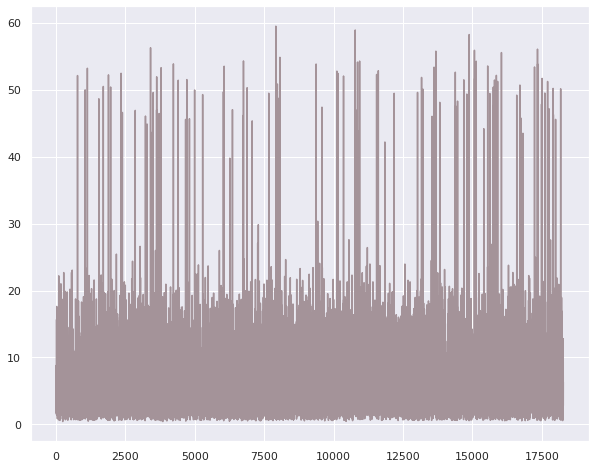

In [27]:
plt.plot(X_test.iloc[:, :1].values, color="#A49399")
plt.show()

Son Adım olarak ise Feature Scalling yani Özellik Ölçeklendirme yapmamız lazım. Tablodan da görüldüğü üzere Yaş ve Bankadaki para arasında ölçek farkı var. Örneğin Yaşlar arasında 34 - 37, Para arasında 171 - 681 ciddi farklar var. Bir değer diğer değeri domine edebilir bunun önüne geçmemiz lazım. Bu algoritmamızda sıkıntı yaratıcak çünkü çoğu makine öğrenmesi algoritması öklid mesafesi kullanılır. Bu değerleri tekrar ölçeklendirmemiz lazım

![picture](https://hackernoon.com/hn-images/1*Ud6qCIDqDEn5k_q3YTaP1g.png)

In [28]:
X_test.shape

(18277, 89)

In [29]:
y_train.shape

(42646,)

In [30]:
y_test.shape

(18277,)

In [31]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()

In [32]:
X_train = standard_X.fit_transform(X_train)
X_test = standard_X.fit_transform(X_test)

Araştırdığımız zaman 3 adet yeniden ölçeklendirme yöntemi olduğunu görürüz.



*   min-max normalization
*   mean normalization
*   standardization

![picture](https://www.oreilly.com/library/view/hands-on-machine-learning/9781788393485/assets/7a9d8cb9-10f7-43b5-b52f-865fbbb0b69e.png)

Xscale = yeni x değeri
x = tablodaki değerimiz
mean = x değerinin ortalaması
sd = standart sapma
Bu formülü bu işlemde her bir değer için uygular

In [33]:
X_train.shape

(42646, 89)

In [34]:
X_train

array([[ 1.99718235, -0.47305886,  1.34528851, ..., -0.21516627,
         1.28630895, -0.3053439 ],
       [-0.7210924 , -0.2048279 , -0.6437807 , ..., -0.21516627,
         1.28630895, -0.3053439 ],
       [ 0.19253425,  1.42840065,  1.0403441 , ..., -0.21516627,
        -0.77741821, -0.3053439 ],
       ...,
       [-1.01307618, -0.05879104, -1.00515963, ..., -0.21516627,
        -0.77741821, -0.3053439 ],
       [-0.62878786, -0.2525134 , -0.61605848, ..., -0.21516627,
        -0.77741821, -0.3053439 ],
       [-0.67776578,  0.8025284 , -0.93882432, ..., -0.21516627,
         1.28630895, -0.3053439 ]])

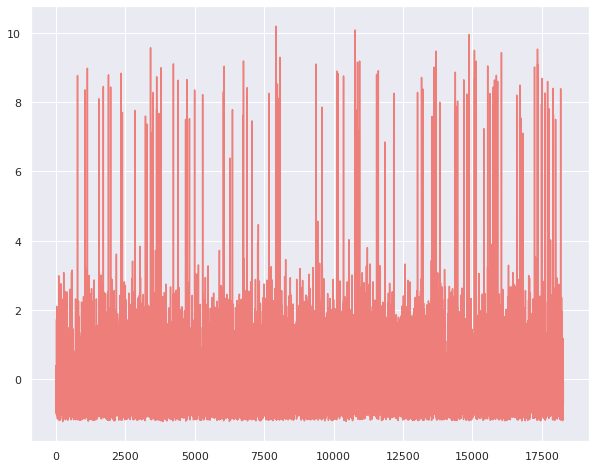

In [35]:
plt.plot(X_test[:, :1], color = "#ED7E79")
plt.show()

Görüldüğü üzere datamızın sayısında herhangi bir değişme olmadı ama değerlerimize Standardizasyon uygulandı böylece daha doğru bir oranda sonuç elde edebileceğiz

## Modeling

In [36]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(random_state= 4711)
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

Modelimizi gerekli işlemler ile train ediyoruz. Biz bu işlem için Logistic Regression'ı seçtik.

In [37]:
model_logistic.score(X_test,y_test) 

0.7650599113640094

Verilen modelimizin işleme sokulduktan sonra % kaç başarı ile çalıştığını gösterir. Accuracy yani tutarlılığımızı gösteriyor.

In [38]:
y_pred_logic = model_logistic.predict(X_test)

Bu adımda aslında çıkması gereken sonucu y_predicted yani önceden beklenen değer içine atıyoruz

In [39]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm_logic = confusion_matrix(y_test, y_pred_logic)
cm_logic

array([[6017, 2162],
       [2132, 7966]])

Bu adımda hata matrisimizin beklenen ve alınan sonucu karşılaştırmasını görüyoruz

Accuracy of Logistic Regression:  0.7650599113640094
              precision    recall  f1-score   support

           e       0.74      0.74      0.74      8149
           p       0.79      0.79      0.79     10128

    accuracy                           0.77     18277
   macro avg       0.76      0.76      0.76     18277
weighted avg       0.77      0.77      0.77     18277



Text(66.5, 0.5, 'Truth')

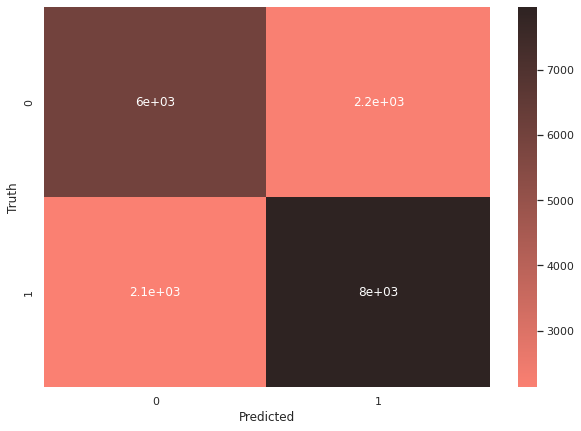

In [40]:
cm = confusion_matrix(y_test, y_pred_logic)

acc_test_logistic = accuracy_score(y_test, y_pred_logic)
plt.figure(figsize=(10,7))
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
print("Accuracy of Logistic Regression: ", model_logistic.score(X_test,y_test))
sns.heatmap(cm,annot=True, cmap=cmap)
print(classification_report(y_pred_logic, y_test))
plt.xlabel('Predicted')
plt.ylabel('Truth')


Bir önceki adımda çizmiş olduğumuz matrisin görselleştirilmiş hali

In [41]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state= 4711, n_estimators=200,max_depth=10)
model_rf.fit(X_train, y_train)  

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=4711)

In [42]:
model_rf.score(X_test,y_test)

0.9712753734201456

In [43]:
y_pred_rf = model_rf.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf

array([[7937,  242],
       [ 283, 9815]])

Accuracy of Random Forest:  0.9712753734201456
              precision    recall  f1-score   support

           e       0.97      0.97      0.97      8220
           p       0.97      0.98      0.97     10057

    accuracy                           0.97     18277
   macro avg       0.97      0.97      0.97     18277
weighted avg       0.97      0.97      0.97     18277



Text(66.5, 0.5, 'Truth')

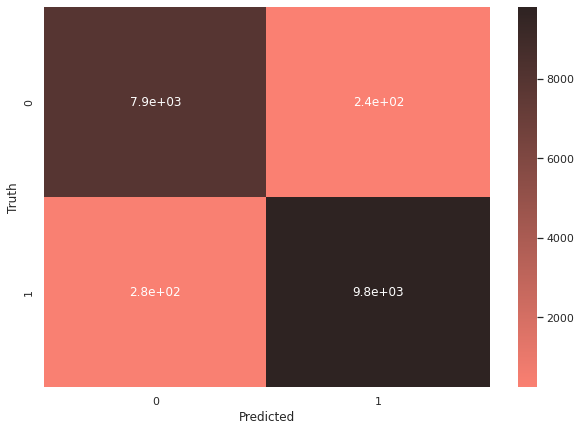

In [47]:
acc_test_rf = accuracy_score(y_test, y_pred_rf)
plt.figure(figsize=(10,7))
cmap = sns.color_palette("dark:salmon_r", as_cmap=True)
print("Accuracy of Random Forest: ", model_rf.score(X_test,y_test))
sns.heatmap(cm_rf,annot=True, cmap=cmap)
print(classification_report(y_pred_rf, y_test))
plt.xlabel('Predicted')
plt.ylabel('Truth')